# About Dataset
### Context
This dataset consists of reviews of fine foods from amazon. The data span a period of more than 10 years, including all ~500,000 reviews up to October 2012. Reviews include product and user information, ratings, and a plain text review. It also includes reviews from all other Amazon categories.

### Data includes:
- Reviews from Oct 1999 - Oct 2012
- 568,454 reviews
- 256,059 users
- 74,258 products
- 260 users with > 50 reviews

## Importing Required Libraries and Modules

In [2]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import random
from collections import Counter

In [3]:
df = pd.read_csv('Reviews.csv') # loading the dataset

df.head() # displaying the first few rows

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


# Data Cleaning

In [4]:
df.isna().sum() # checking for missing values

Id                         0
ProductId                  0
UserId                     0
ProfileName               26
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [5]:
df=df.dropna(subset=['ProfileName','Summary']) # dropping the missing values from the dataset

In [6]:
df.isna().sum() # no more missinng values

Id                        0
ProductId                 0
UserId                    0
ProfileName               0
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   0
Text                      0
dtype: int64

In [7]:
def labelling(score): # labelling different scores in 3 classes
    if score >= 4:
        return 'Positive'
    elif score == 3:
        return 'Neutral'
    else:
        return 'Negative'

In [8]:
df['Sentiment']=df['Score'].apply(labelling) # applying the above definition

In [9]:
df.head() # reviewing the dataset

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Sentiment
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,Positive
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,Negative
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,Positive
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,Negative
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,Positive


## Stemming

In [10]:
nltk.download('stopwords')
stop_words=stopwords.words('english')
stop_words # words which have minimum importance in the text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT0001\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [11]:
port_stem=PorterStemmer() # creating an object of PorterStemmer()

In [12]:
pattern=re.compile('[^a-zA-Z]') # pattern storing the special characters and numbers

In [ ]:
def stemming(content):
    stemmed_content = re.sub(pattern,' ',content)  # removing all the characters from the content other than a-z or A-Z
    stemmed_content=stemmed_content.lower() # lowering all the characters from the content
    stemmed_content=stemmed_content.split() # splitting all the words from the content and storing it in a list
    stemmed_content=[port_stem.stem(word) for word in stemmed_content if word not in stop_words]# stemming each word presnt in the list and then putting back only those words which are not stopwords
    stemmed_content=' '.join(stemmed_content) # joining back all the words of the content together with a ' '

    return stemmed_content

In [14]:
df['Stemmed_Content']=df['Text'].apply(stemming) # applying stemming definitionon df['Text'] and creating a new feature 'Stemmed_Content'

## Indepndent and Dependent Variables

In [15]:
X=df['Stemmed_Content'].values # independent variable
y=df['Sentiment'].values # dependent variable

In [16]:
X

array(['bought sever vital can dog food product found good qualiti product look like stew process meat smell better labrador finicki appreci product better',
       'product arriv label jumbo salt peanut peanut actual small size unsalt sure error vendor intend repres product jumbo',
       'confect around centuri light pillowi citru gelatin nut case filbert cut tini squar liber coat powder sugar tini mouth heaven chewi flavor highli recommend yummi treat familiar stori c lewi lion witch wardrob treat seduc edmund sell brother sister witch',
       ...,
       'star small give one train session tri train dog ceaser dog treat made puppi hyper compar ingredi know littl star basic food ingredi without preserv food color sweet potato flavor also make hand smell like dog food',
       'best treat train reward dog good groom lower calori love doggi sweet potato seem favorit wet nose treat',
       'satisfi product advertis use cereal raw vinegar gener sweetner'],
      dtype=object)

In [17]:
y

array(['Positive', 'Negative', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

## Train Test Split

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y,random_state=2)

In [19]:
X.shape,X_train.shape,X_test.shape

((568401,), (454720,), (113681,))

In [20]:
X_train

array(['far good use bake scrambl egg breakfast recommend mix littl dryer recommend scrambl',
       'love support type gluten free organ energi bar packag look wonder energi bar pack lot good stuff howev tast like soap first thought might banana palat scream soap trust realiz eat calori pack chocol bar purchas expect tast better could eat get soap tast mouth',
       'dog love zp primarili zp venison kind guy due allergi tri introduc new protein sourc turn varieti zp includ venison fish lamb gobbl without hesit clearli know food good suspect would requir dous can food wonder thing zp super high qualiti grain filler dog love boy titan look better ever alway strong dog zp look like lift weight exclus zp diet month coat shini velveti like champion racehors br br someth attest suprem flavor food recent run low zp supplement raw venison put bowl raw venison ration zp push raw venison chunk around look gave familiar nod say gonna give raw venison titan want zp noth',
       ...,
       'sup

In [21]:
X_test

array(['cooki chocol cooki newman like chocol cooki best use chocol crust cheesecak br br great cooki profit go chariti organ pesticid free possibl grown sustain method',
       'drink stash premium moroccan mint green tea day advers overdos effect caffein flavor grassi like green tea clean normal like mint tast anyth gum toothpast mint subtl goe great clean tast tea besid green tea ingredi spearmint lemongrass peppermint lemongrass anoth ingredi overwhelm truli tast write realiz contain lot flavor work fact enjoy much get littl anxiou let run low great thing abl order bulk amazon br br want note tea get littl bitter steep long tri go longer five minut often forget work drinkabl notic hand aficionado worri temperatur water use brew tea home use hot water come keurig coffe maker work use hot water filter water dispens evidenc amount consum flavor come great',
       'cooki absolut delici addict disappoint amazon ship other say cooki mint condit sorri pun coupl broken half date month won

In [22]:
y_train

array(['Positive', 'Negative', 'Positive', ..., 'Positive', 'Positive',
       'Positive'], dtype=object)

In [23]:
y_test

array(['Positive', 'Positive', 'Positive', ..., 'Positive', 'Negative',
       'Positive'], dtype=object)

## Vectorization

In [24]:
# converting the textual data into numerical values
vectorizer=TfidfVectorizer(max_features=5000) # initializing TF-IDF Vectorizer

In [25]:
X_train_vec=vectorizer.fit_transform(X_train)
X_test_vec=vectorizer.transform(X_test)

In [26]:
print(X_train_vec)

  (0, 1338)	0.3909831464986795
  (0, 2539)	0.13708869065675827
  (0, 2786)	0.1589325134525917
  (0, 3550)	0.2906148930122031
  (0, 488)	0.2125673202151223
  (0, 1397)	0.2452304237153811
  (0, 3808)	0.7164015906361427
  (0, 279)	0.21217057147208446
  (0, 4705)	0.11264271731603563
  (0, 1894)	0.10082643056326084
  (0, 1578)	0.1794367367816213
  (1, 2841)	0.12441059791471802
  (1, 1837)	0.06771134800249853
  (1, 989)	0.09335345952161672
  (1, 366)	0.08248712828836442
  (1, 1526)	0.11008176941415339
  (1, 3458)	0.08962704028489314
  (1, 767)	0.09774670679154819
  (1, 598)	0.10683011205463061
  (1, 1376)	0.15399450985811883
  (1, 3534)	0.14097700688888018
  (1, 4600)	0.15734952325502227
  (1, 3812)	0.20930048665833687
  (1, 3120)	0.16035143977483574
  (1, 289)	0.14945230424020695
  :	:
  (454718, 3179)	0.10187810112890754
  (454718, 131)	0.09075503847897824
  (454718, 4270)	0.11548086821684013
  (454718, 2613)	0.23291518813120687
  (454718, 2574)	0.09202626166225769
  (454718, 472)	0.100932

In [27]:
print(X_test_vec)

  (0, 4705)	0.07984308701114105
  (0, 4330)	0.23444907451381722
  (0, 3408)	0.23279809253682057
  (0, 3328)	0.17256523099266577
  (0, 3218)	0.24134219015490374
  (0, 3062)	0.12862691441685206
  (0, 2930)	0.18757955452345515
  (0, 2732)	0.20772339786285313
  (0, 2518)	0.0654062629305918
  (0, 1963)	0.1992440739640017
  (0, 1937)	0.0758481458558805
  (0, 1878)	0.10007556101585284
  (0, 1751)	0.11569888425170506
  (0, 1051)	0.2104070865972014
  (0, 966)	0.5424733382942792
  (0, 767)	0.3576816858516443
  (0, 725)	0.25215538695789397
  (0, 709)	0.25819390503669803
  (0, 472)	0.14882195404335014
  (0, 364)	0.09772121931554272
  (1, 4936)	0.09389731669617753
  (1, 4924)	0.08667326233156823
  (1, 4919)	0.1710454036737963
  (1, 4824)	0.2369154918407052
  (1, 4809)	0.05438671013695505
  :	:
  (113679, 1229)	0.06944532308461718
  (113679, 1108)	0.04211618115179564
  (113679, 1070)	0.10120038223525533
  (113679, 892)	0.057549630059502546
  (113679, 854)	0.06148871208795573
  (113679, 815)	0.070476

## Model Training

In [28]:
model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000) # Multinomial Logistic Regression

In [29]:
model.fit(X_train_vec,y_train) # fitting the model into training data

LogisticRegression(max_iter=1000, multi_class='multinomial')

## Model Evaluation

### Accuracy

In [30]:
y_train_pred=model.predict(X_train_vec)
training_data_accuracy=accuracy_score(y_train,y_train_pred)
print('Accuarcy on the training data:',training_data_accuracy)
# training data is also predicted to check for overfitting condition

Accuarcy on the training data: 0.8689281315974666


In [31]:
y_test_pred=model.predict(X_test_vec)
testing_data_accuracy=accuracy_score(y_test,y_test_pred)
print('Accuarcy on the testing data:',testing_data_accuracy)

Accuarcy on the testing data: 0.8647619215172281


In [32]:
print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

    Negative       0.74      0.66      0.70     16401
     Neutral       0.52      0.19      0.27      8528
    Positive       0.90      0.97      0.93     88752

    accuracy                           0.86    113681
   macro avg       0.72      0.60      0.63    113681
weighted avg       0.84      0.86      0.85    113681



## Saving the model using pickle for future predictions

In [33]:
import pickle

In [34]:
pickle.dump(model,open('trained_model.pkl','wb'))

In [35]:
pickle.dump(vectorizer,open('vectorized.pkl','wb'))

In [36]:
loaded_model=pickle.load(open('trained_model.pkl','rb'))

## Testing the model

In [37]:
i=random.randint(0,len(X_test)- 1) # picking a random index

print("Review Text:")
print(X_test[i])
print("\nActual Sentiment:", y_test[i])
print("Predicted Sentiment:", y_test_pred[i])

#checking if they match
if y_test_pred[i] == y_test[i]:
    print("\nPrediction is correct!")
else:
    print("\nPrediction is incorrect.")


Review Text:
love tea combin russian caravan blend assam combin hint lapsang souchong oolong delici like know exactli tea blend purchas blend give detail label

Actual Sentiment: Positive
Predicted Sentiment: Positive

Prediction is correct!


## Business Insights and Visualization

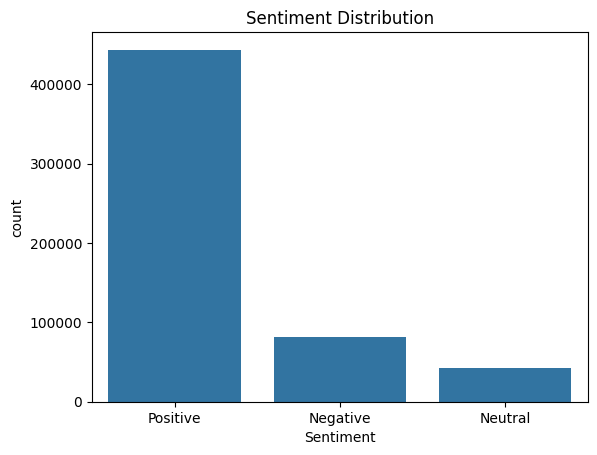

In [ ]:
sns.countplot(data=df,x='Sentiment')
plt.title("Sentiment Distribution")
plt.show()

In [39]:
neg_reviews=df[df['Sentiment']=='Negative']['Stemmed_Content']
neg_reviews

1         product arriv label jumbo salt peanut peanut a...
3         look secret ingredi robitussin believ found go...
12        cat happili eat felida platinum two year got n...
16        love eat good watch tv look movi sweet like tr...
26              candi red flavor plan chewi would never buy
                                ...                        
568433    bought soup today local grocer brought back wo...
568434    soup mostli broth although kick also sweet tas...
568435    mostli broth advertis cup veget howev cup cont...
568446    order month back great latest batch terribl an...
568450    disappoint flavor chocol note especi weak milk...
Name: Stemmed_Content, Length: 82007, dtype: object

In [40]:
neg_words=' '.join(neg_reviews).split()
neg_words

['product',
 'arriv',
 'label',
 'jumbo',
 'salt',
 'peanut',
 'peanut',
 'actual',
 'small',
 'size',
 'unsalt',
 'sure',
 'error',
 'vendor',
 'intend',
 'repres',
 'product',
 'jumbo',
 'look',
 'secret',
 'ingredi',
 'robitussin',
 'believ',
 'found',
 'got',
 'addit',
 'root',
 'beer',
 'extract',
 'order',
 'good',
 'made',
 'cherri',
 'soda',
 'flavor',
 'medicin',
 'cat',
 'happili',
 'eat',
 'felida',
 'platinum',
 'two',
 'year',
 'got',
 'new',
 'bag',
 'shape',
 'food',
 'differ',
 'tri',
 'new',
 'food',
 'first',
 'put',
 'bowl',
 'bowl',
 'sit',
 'full',
 'kitti',
 'touch',
 'food',
 'notic',
 'similar',
 'review',
 'relat',
 'formula',
 'chang',
 'past',
 'unfortun',
 'need',
 'find',
 'new',
 'food',
 'cat',
 'eat',
 'love',
 'eat',
 'good',
 'watch',
 'tv',
 'look',
 'movi',
 'sweet',
 'like',
 'transfer',
 'zip',
 'lock',
 'baggi',
 'stay',
 'fresh',
 'take',
 'time',
 'eat',
 'candi',
 'red',
 'flavor',
 'plan',
 'chewi',
 'would',
 'never',
 'buy',
 'oatmeal',
 'go

In [41]:
count=Counter(neg_words)
count

Counter({'product': 42622,
         'arriv': 4014,
         'label': 3900,
         'jumbo': 62,
         'salt': 4440,
         'peanut': 2717,
         'actual': 5703,
         'small': 4988,
         'size': 3909,
         'unsalt': 53,
         'sure': 5852,
         'error': 269,
         'vendor': 931,
         'intend': 371,
         'repres': 243,
         'look': 12995,
         'secret': 121,
         'ingredi': 10590,
         'robitussin': 12,
         'believ': 2597,
         'found': 6310,
         'got': 9573,
         'addit': 1664,
         'root': 608,
         'beer': 466,
         'extract': 1161,
         'order': 18455,
         'good': 22187,
         'made': 10684,
         'cherri': 1031,
         'soda': 1560,
         'flavor': 30107,
         'medicin': 587,
         'cat': 10688,
         'happili': 170,
         'eat': 17769,
         'felida': 26,
         'platinum': 19,
         'two': 8935,
         'year': 7514,
         'new': 5520,
         'bag': 1

In [42]:
# top 10 negative words
common_words=count.most_common(10)
common_words

[('br', 104618),
 ('tast', 49887),
 ('like', 48421),
 ('product', 42622),
 ('one', 30630),
 ('flavor', 30107),
 ('would', 27019),
 ('tri', 26498),
 ('food', 26001),
 ('coffe', 23824)]

In [43]:
common_words_df = pd.DataFrame(common_words, columns=['Word', 'Frequency'])

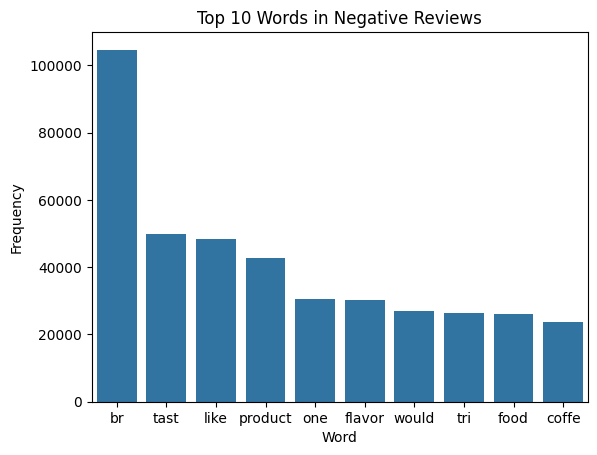

In [ ]:
sns.barplot(data=common_words_df,x='Word',y='Frequency')
plt.title("Top 10 Words in Negative Reviews")
plt.show()